#### Import Libraries

In [ ]:
# import sys
# !{sys.executable} -m 
# # pip install -U nltk
# # nltk
# # matplotlib

In [1]:
import nltk

In [2]:
nltk.__version__

'3.6.2'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def showImage(x):    
    plt.figure(figsize=(20,12))
    plt.axis('off')
    img = mpimg.imread('./' + str(x) + '.PNG')
    plt.imshow(img)

In [4]:
import nltk
# nltk.download()
# C:\Users\user\AppData\Roaming\nltk_data

## Tokenizing Text and WordNet Basics

1 Tokenizing text into sentences  
2 Tokenizing sentences into words  
3 Tokenizing sentences using regular expressions  
4 Training a sentence tokenizer  
5 Filtering stopwords in a tokenized sentence  
6 Looking up Synsets for a word in WordNet  
7 Looking up lemmas and synonyms in WordNet  
8 Calculating WordNet Synset similarity  
9 Discovering word collocation  

#### Senetence Tokenize

The sent_tokenize function uses an instance of PunktSentenceTokenizer from the 
nltk.tokenize.punkt module. This instance has already been trained and works well for 
many European languages. So it knows what punctuation and characters mark the end of a 
sentence and the beginning of a new sentenc

In [5]:
para = "Hello World. It's good to see you. Thanks for buying this book."

In [6]:
# nltk.download('punkt')

from nltk.tokenize import sent_tokenize
sent_tokenize(para)

['Hello World.', "It's good to see you.", 'Thanks for buying this book.']

The instance used in sent_tokenize() is actually loaded on demand from a pickle 
file. So if you're going to be tokenizing a lot of sentences, it's more efficient to load the 
PunktSentenceTokenizer class once, and call its tokenize() method instead:

In [7]:
# ERROR

# import nltk.data
# tokenizer = nltk.data.load('C:\\Users\\user\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt\\PY3\\english.pickle')
# tokenizer.tokenize(para)
# ['Hello World.', "It's good to see you.", 'Thanks for buying this book.']

In [8]:
# nltk.download('webtext')

from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import webtext
text = webtext.raw('overheard.txt')
sent_tokenizer = PunktSentenceTokenizer(text)

In [9]:
sents1 = sent_tokenizer.tokenize(text)
sents1[0]

'White guy: So, do you have any plans for this evening?'

In [10]:
from nltk.tokenize import sent_tokenize
sents2 = sent_tokenize(text)
sents2[0]

'White guy: So, do you have any plans for this evening?'

In [11]:
# Difference

print(sents1[678])
print(sents2[678])

Girl: But you already have a Big Mac...
Girl: But you already have a Big Mac...
Hobo: Oh, this is all theatrical.


The default tokenizer includes the next line of dialog, while our custom tokenizer correctly thinks that 
the next line is a separate sentence. This difference is a good demonstration of why it can 
be useful to train your own sentence tokenizer, especially when your text isn't in the typical 
paragraph-sentence structure

In [12]:
# How to use on your own corpus

with open('/usr/share/nltk_data/corpora/webtext/overheard.txt', 
encoding='ISO-8859-2') as f:
    text = f.read()
    sent_tokenizer = PunktSentenceTokenizer(text)
    sents = sent_tokenizer.tokenize(text)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/nltk_data/corpora/webtext/overheard.txt'

#### Word Tokenize

In [13]:
from nltk.tokenize import word_tokenize
word_tokenize('Hello World.')

['Hello', 'World', '.']

The word_tokenize() function is a wrapper function that calls tokenize() on an 
instance of the TreebankWordTokenizer class.   
It's equivalent to the following code

In [14]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize('Hello World.')

['Hello', 'World', '.']

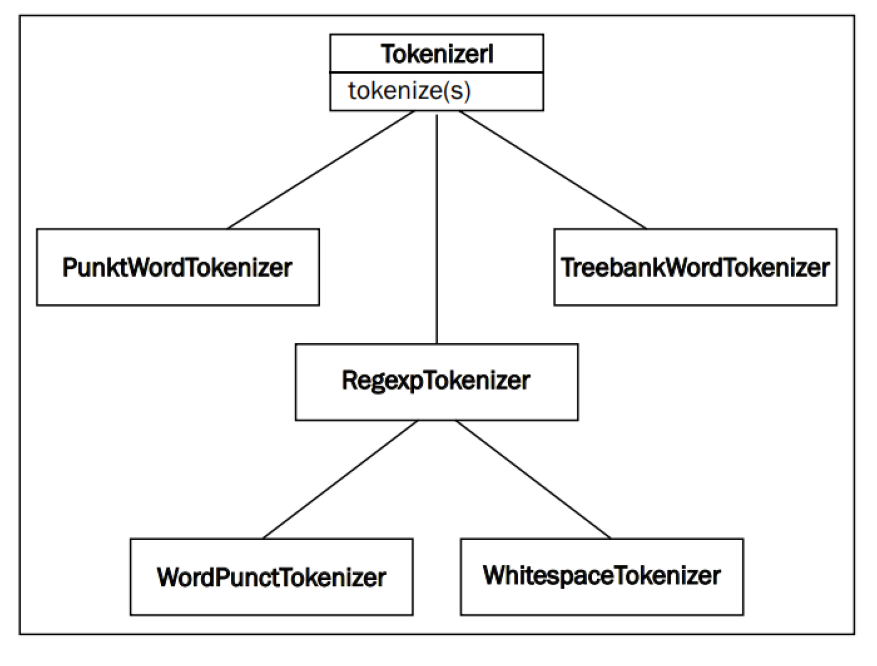

In [15]:
showImage(1)

In [16]:
word_tokenize("Can't is a contraction.")

['Ca', "n't", 'is', 'a', 'contraction', '.']

In [19]:
from nltk.tokenize import PunktWordTokenizer
tokenizer = PunktWordTokenizer()
tokenizer.tokenize("Can't is a contraction.")

# Output: ['Can', "'t", 'is', 'a', 'contraction.']

In [18]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokenizer.tokenize("Can't is a contraction.")

['Can', "'", 't', 'is', 'a', 'contraction', '.']

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction']

In [21]:
from nltk.tokenize import regexp_tokenize
regexp_tokenize("Can't is a contraction.", "[\w']+")

["Can't", 'is', 'a', 'contraction']

In [22]:
# Whitespace Tokenizer
tokenizer = RegexpTokenizer('\s+', gaps=True)
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction.']

#### Stop Words

In [23]:
# nltk.download('stopwords')

from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
words = ["Can't", 'is', 'a', 'contraction']
[word for word in words if word not in english_stops]

["Can't", 'contraction']

#### Looking up Synsets for a word in WordNet

WordNet is a lexical database for the English language. In other words, it's a dictionary 
designed specifically for natural language processing.  


NLTK comes with a simple interface to look up words in WordNet. What you get is a list of 
Synset instances, which are groupings of synonymous words that express the same concept. 
Many words have only one Synset, but some have several. In this recipe, we'll explore a single 
Synset, and in the next recipe, we'll look at several in more detail

In [24]:
# nltk.download('wordnet')

from nltk.corpus import wordnet
syn = wordnet.synsets('cookbook')[0]
print(syn.name())
print(syn.definition())


cookbook.n.01
a book of recipes and cooking directions


In [25]:
wordnet.synsets("Blood")

[Synset('blood.n.01'),
 Synset('blood.n.02'),
 Synset('rake.n.01'),
 Synset('lineage.n.01'),
 Synset('blood.n.05'),
 Synset('blood.v.01')]

In [26]:
 wordnet.synsets('cooking')[0].examples()

['cooking can be a great art',
 'people are needed who have experience in cookery',
 'he left the preparation of meals to his wife']

In [27]:
 wordnet.synsets('Blood')[0].examples()

['blood carries oxygen and nutrients to the tissues and carries away waste products',
 'the ancients believed that blood was the seat of the emotions']

#### Working with hypernyms
Synsets are organized in a structure similar to that of an inheritance tree. More abstract terms 
are known as hypernyms and more specific terms are hyponyms. This tree can be traced all 
the way up to a root hypernym.  

Hypernyms provide a way to categorize and group words based on their similarity to each 
other. The Calculating WordNet Synset similarity recipe details the functions used to calculate 
the similarity based on the distance between two words in the hypernym tree:

In [28]:
syn.hypernyms()

[Synset('reference_book.n.01')]

In [29]:
syn.hypernyms()[0].hyponyms()

[Synset('annual.n.02'),
 Synset('atlas.n.02'),
 Synset('cookbook.n.01'),
 Synset('directory.n.01'),
 Synset('encyclopedia.n.01'),
 Synset('handbook.n.01'),
 Synset('instruction_book.n.01'),
 Synset('source_book.n.01'),
 Synset('wordbook.n.01')]

In [30]:
syn.root_hypernyms()

[Synset('entity.n.01')]

As you can see, reference_book is a hypernym of cookbook, but cookbook is only one of 
the many hyponyms of reference_book. And all these types of books have the same root 
hypernym, which is entity, one of the most abstract terms in the English language. You can 
trace the entire path from entity down to cookbook using the hypernym_paths() method, 
as follows

In [31]:
syn.hypernym_paths()

[[Synset('entity.n.01'),
  Synset('physical_entity.n.01'),
  Synset('object.n.01'),
  Synset('whole.n.02'),
  Synset('artifact.n.01'),
  Synset('creation.n.02'),
  Synset('product.n.02'),
  Synset('work.n.02'),
  Synset('publication.n.01'),
  Synset('book.n.01'),
  Synset('reference_book.n.01'),
  Synset('cookbook.n.01')]]

Noun      n  
Adjective a  
Adverb    r  
Verb      v  

In [32]:
syn.pos()

'n'

In [33]:
print(wordnet.synsets('great'))
len(wordnet.synsets('great'))

[Synset('great.n.01'), Synset('great.s.01'), Synset('great.s.02'), Synset('great.s.03'), Synset('bang-up.s.01'), Synset('capital.s.03'), Synset('big.s.13')]


7

In [34]:
wordnet.synsets('great', pos='n')

[Synset('great.n.01')]

In [35]:
len(wordnet.synsets('great', pos='n'))

1

#### Looking up lemmas and synonyms in WordNet

Building on the previous recipe, we can also look up lemmas in WordNet to find synonyms 
of a word. A lemma (in linguistics), is the canonical form or morphological form of a word

In [36]:
from nltk.corpus import wordnet
syn = wordnet.synsets('cookbook')[0]
lemmas = syn.lemmas()
len(lemmas)

2

In [37]:
lemmas[0].name()

'cookbook'

In [38]:
lemmas[1].name()

'cookery_book'

In [39]:
lemmas[0].synset() == lemmas[1].synset()

True

In [40]:
[lemma.name() for lemma in syn.lemmas()]

['cookbook', 'cookery_book']

In [41]:
 synonyms = []
for syn in wordnet.synsets('book'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
len(synonyms)

38

In [42]:
synonyms

['book',
 'book',
 'volume',
 'record',
 'record_book',
 'book',
 'script',
 'book',
 'playscript',
 'ledger',
 'leger',
 'account_book',
 'book_of_account',
 'book',
 'book',
 'book',
 'rule_book',
 'Koran',
 'Quran',
 "al-Qur'an",
 'Book',
 'Bible',
 'Christian_Bible',
 'Book',
 'Good_Book',
 'Holy_Scripture',
 'Holy_Writ',
 'Scripture',
 'Word_of_God',
 'Word',
 'book',
 'book',
 'book',
 'reserve',
 'hold',
 'book',
 'book',
 'book']

In [43]:
 len(set(synonyms))

25

#### Antonyms
Some lemmas also have antonyms. The word good, for example, has 27 Synsets, five 
of which have lemmas with antonyms, as shown in the following code:

In [44]:
gn2 = wordnet.synset('good.n.02')
gn2.definition()

'moral excellence or admirableness'

In [45]:
evil = gn2.lemmas()[0].antonyms()[0]
evil.name()

'evil'

In [46]:
evil.synset().definition()

'the quality of being morally wrong in principle or practice'

In [47]:
ga1 = wordnet.synset('good.a.01')
ga1.definition()

'having desirable or positive qualities especially those suitable for a thing specified'

In [48]:
bad = ga1.lemmas()[0].antonyms()[0]
bad.name()

'bad'

In [49]:
bad.synset().definition()

'having undesirable or negative qualities'

The antonyms() method returns a list of lemmas. In the first case, as we can see in the 
previous code, the second Synset for good as a noun is defined as moral excellence, 
and its first antonym is evil, defined as morally wrong. In the second case, when good is 
used as an adjective to describe positive qualities, the first antonym is bad, which describes 
negative qualities

#### Calculating WordNet Synset similarity
Synsets are organized in a hypernym tree. This tree can be used for reasoning about 
the similarity between the Synsets it contains. The closer the two Synsets are in the tree, 
the more similar they are

If you were to look at all the hyponyms of reference_book (which is the hypernym of 
cookbook), you'd see that one of them is instruction_book. This seems intuitively very 
similar to a cookbook, so let's see what WordNet similarity has to say about it with the help 
of the following code:

In [50]:
from nltk.corpus import wordnet
cb = wordnet.synset('cookbook.n.01')
ib = wordnet.synset('instruction_book.n.01')
cb.wup_similarity(ib)

0.9166666666666666

The wup_similarity method is short for Wu-Palmer Similarity, which is a scoring method 
based on how similar the word senses are and where the Synsets occur relative to each other 
in the hypernym tree. One of the core metrics used to calculate similarity is the shortest path 
distance between the two Synsets and their common hypernym:

In [52]:
ref = cb.hypernyms()[0]
cb.shortest_path_distance(ref)

1

In [53]:
ib.shortest_path_distance(ref)

1

In [54]:
cb.shortest_path_distance(ib)

2

So cookbook and instruction_book must be very similar, because they are only one step 
away from the same reference_book hypernym, and, therefore, only two steps away from 
each other

In [55]:
dog = wordnet.synsets('dog')[0]
dog.wup_similarity(cb)

0.38095238095238093

Wow, dog and cookbook are apparently 38% similar! This is because they share common 
hypernyms further up the tree:

In [57]:
sorted(dog.common_hypernyms(cb))

[Synset('entity.n.01'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('whole.n.02')]

#### Comparing verbs
The previous comparisons were all between nouns, but the same can be done for verbs 
as well:

In [59]:
cook = wordnet.synset('cook.v.01')
bake = wordnet.synset('bake.v.02')
cook.wup_similarity(bake)

0.6666666666666666

The previous Synsets were obviously handpicked for demonstration, and the reason is that 
the hypernym tree for verbs has a lot more breadth and a lot less depth. While most nouns 
can be traced up to the hypernym object, thereby providing a basis for similarity, many 
verbs do not share common hypernyms, making WordNet unable to calculate the similarity. 
For example, if you were to use the Synset for bake.v.01 in the previous code, instead of 
bake.v.02, the return value would be None. This is because the root hypernyms of both the 
Synsets are different, with no overlapping paths. For this reason, you also cannot calculate 
the similarity between words with different parts of speech.

#### Path and Leacock Chordorow (LCH) similarity
Two other similarity comparisons are the path similarity and the LCH similarity, as shown in 
the following code:

In [60]:
print(cb.path_similarity(ib))

print(cb.path_similarity(dog))

print(cb.lch_similarity(ib))

print(cb.lch_similarity(dog))

0.3333333333333333
0.07142857142857142
2.538973871058276
0.9985288301111273


### Discovering word collocations
Collocations are two or more words that tend to appear frequently together, such as United 
States. Of course, there are many other words that can come after United, such as United 
Kingdom and United Airlines. As with many aspects of natural language processing, context 
is very important. And for collocations, context is everything!

In the case of collocations, the context will be a document in the form of a list of words. 
Discovering collocations in this list of words means that we'll find common phrases that 
occur frequently throughout the text. For fun, we'll start with the script for Monty Python 
and the Holy Grail

We're going to create a list of all lowercased words in the text, and then produce 
BigramCollocationFinder, which we can use to find bigrams, which are pairs of words. 
These bigrams are found using association measurement functions in the nltk.metrics
package, as follows:

In [61]:
from nltk.corpus import webtext
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

words = [w.lower() for w in webtext.words('grail.txt')]
bcf = BigramCollocationFinder.from_words(words)
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)

[("'", 's'), ('arthur', ':'), ('#', '1'), ("'", 't')]

Well, that's not very useful! Let's refine it a bit by adding a word filter to remove punctuation 
and stopwords:

In [62]:
from nltk.corpus import stopwords
stopset = set(stopwords.words('english'))

filter_stops = lambda w: len(w) < 3 or w in stopset
bcf.apply_word_filter(filter_stops)
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)

[('black', 'knight'),
 ('clop', 'clop'),
 ('head', 'knight'),
 ('mumble', 'mumble')]

BigramCollocationFinder constructs two frequency distributions: one for each word, 
and another for bigrams. A frequency distribution, or FreqDist in NLTK, is basically an 
enhanced Python dictionary where the keys are what's being counted, and the values are 
the counts. Any filtering functions that are applied reduce the size of these two FreqDists
by eliminating any words that don't pass the filter. By using a filtering function to eliminate all 
words that are one or two characters, and all English stopwords, we can get a much cleaner 
result. After filtering, the collocation finder is ready to accept a generic scoring function for 
finding collocations

In [63]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures


words = [w.lower() for w in webtext.words('singles.txt')]
tcf = TrigramCollocationFinder.from_words(words)
tcf.apply_word_filter(filter_stops)
tcf.apply_freq_filter(3)
tcf.nbest(TrigramAssocMeasures.likelihood_ratio, 4)

[('long', 'term', 'relationship')]

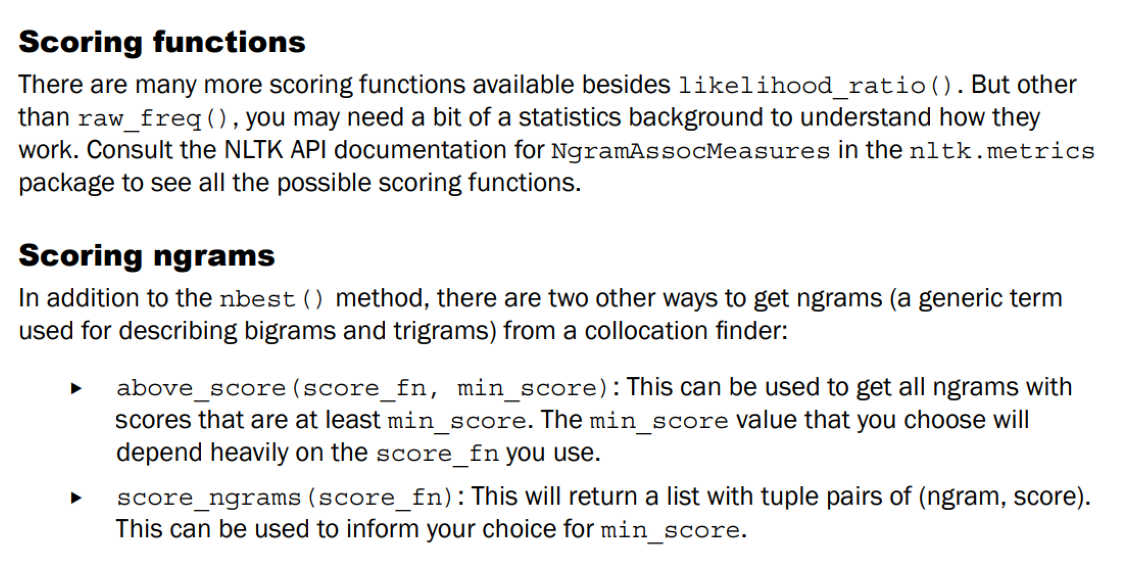

In [64]:
showImage(2)